### Import Libraries

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

### Load Data

In [2]:
HR = pd.read_csv('C:\\Users\\Work-Station\\Desktop\\Final project\\1- Data\\HumanResources.csv')

### Explore Data

In [3]:
HR.head()

,Employee_ID,First Name,Last Name,Gender,State,City,Education Level,Birthdate,Hiredate,Termdate,Department,Job Title,Salary,Performance Rating
0,00-95822412,Danielle,Johnson,0,New York,New York City,High School,13/02/1980,2016-04-16,5/7/2021,Customer Service,Help Desk Technician,81552,1
1,00-42868828,John,Taylor,1,North Carolina,Charlotte,Bachelor,22/09/1987,2017-02-09,14/06/2019,IT,System Administrator,107520,3
2,00-83197857,Erica,Mcclain,1,New York,New York City,Bachelor,19/05/1994,2016-02-03,6/3/2021,Operations,Logistics Coordinator,61104,3
3,00-13999315,Brittany,Johnson,1,New York,New York City,Bachelor,18/04/1980,2016-02-06,6/11/2018,Operations,Inventory Specialist,73770,3
4,00-90801586,Jeffery,Wagner,0,New York,New York City,Bachelor,7/4/1985,2015-01-11,NaN,Operations,Operations Analyst,55581,2


In [4]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 0 to 8765
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employee_ID         8766 non-null   object
 1   First Name          8766 non-null   object
 2   Last Name           8766 non-null   object
 3   Gender              8766 non-null   int64 
 4   State               8766 non-null   object
 5   City                8766 non-null   object
 6   Education Level     8766 non-null   object
 7   Birthdate           8766 non-null   object
 8   Hiredate            8766 non-null   object
 9   Termdate            966 non-null    object
 10  Department          8766 non-null   object
 11  Job Title           8766 non-null   object
 12  Salary              8766 non-null   int64 
 13  Performance Rating  8766 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 958.9+ KB


In [5]:
print(HR.describe())

            Gender         Salary  Performance Rating
count  8766.000000    8766.000000         8766.000000
mean      0.537531   70971.989733            2.644079
std       0.498618   13737.564838            0.911330
min       0.000000   51835.000000            1.000000
25%       0.000000   60938.500000            2.000000
50%       1.000000   66652.000000            3.000000
75%       1.000000   78639.500000            3.000000
max       1.000000  149377.000000            4.000000


### Data Cleaning

In [6]:
# check for nulls
HR.isnull().sum()

Employee_ID              0
First Name               0
Last Name                0
Gender                   0
State                    0
City                     0
Education Level          0
Birthdate                0
Hiredate                 0
Termdate              7800
Department               0
Job Title                0
Salary                   0
Performance Rating       0
dtype: int64

In [7]:
HR.isna().sum()

Employee_ID              0
First Name               0
Last Name                0
Gender                   0
State                    0
City                     0
Education Level          0
Birthdate                0
Hiredate                 0
Termdate              7800
Department               0
Job Title                0
Salary                   0
Performance Rating       0
dtype: int64

In [8]:
# Replacing nulls in termdate with Still Employee
HR['Termdate']= HR['Termdate'].fillna('Still Employee')

In [9]:
#function to convert to time and leave values as they are
def convert_date(value):
    try:
        date = pd.to_datetime(value, format='%d/%m/%Y', errors='raise')
        return date.date()
    except ValueError:
        return value 

In [10]:
#changing data types to date 
HR['Birthdate'] = pd.to_datetime(HR['Birthdate'], format='%d/%m/%Y')
HR['Hiredate'] = pd.to_datetime(HR['Hiredate'])
HR['Termdate'] = HR['Termdate'].apply(convert_date)

In [11]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 0 to 8765
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Employee_ID         8766 non-null   object        
 1   First Name          8766 non-null   object        
 2   Last Name           8766 non-null   object        
 3   Gender              8766 non-null   int64         
 4   State               8766 non-null   object        
 5   City                8766 non-null   object        
 6   Education Level     8766 non-null   object        
 7   Birthdate           8766 non-null   datetime64[ns]
 8   Hiredate            8766 non-null   datetime64[ns]
 9   Termdate            8766 non-null   object        
 10  Department          8766 non-null   object        
 11  Job Title           8766 non-null   object        
 12  Salary              8766 non-null   int64         
 13  Performance Rating  8766 non-null   int64       

In [12]:
(HR['Termdate'] == 'Still Employee').sum()

7800

In [13]:
HR.isnull().sum()

Employee_ID           0
First Name            0
Last Name             0
Gender                0
State                 0
City                  0
Education Level       0
Birthdate             0
Hiredate              0
Termdate              0
Department            0
Job Title             0
Salary                0
Performance Rating    0
dtype: int64

In [14]:
HR.isna().sum()

Employee_ID           0
First Name            0
Last Name             0
Gender                0
State                 0
City                  0
Education Level       0
Birthdate             0
Hiredate              0
Termdate              0
Department            0
Job Title             0
Salary                0
Performance Rating    0
dtype: int64

In [15]:
#check for duplicate
HR.duplicated().sum()

0

In [16]:
#replacing values of gender
HR['Gender'] = HR['Gender'].replace({
    1: 'Male', 
    0: 'Female'
    })

HR.head()

,Employee_ID,First Name,Last Name,Gender,State,City,Education Level,Birthdate,Hiredate,Termdate,Department,Job Title,Salary,Performance Rating
0,00-95822412,Danielle,Johnson,Female,New York,New York City,High School,1980-02-13,2016-04-16,2021-07-05,Customer Service,Help Desk Technician,81552,1
1,00-42868828,John,Taylor,Male,North Carolina,Charlotte,Bachelor,1987-09-22,2017-02-09,2019-06-14,IT,System Administrator,107520,3
2,00-83197857,Erica,Mcclain,Male,New York,New York City,Bachelor,1994-05-19,2016-02-03,2021-03-06,Operations,Logistics Coordinator,61104,3
3,00-13999315,Brittany,Johnson,Male,New York,New York City,Bachelor,1980-04-18,2016-02-06,2018-11-06,Operations,Inventory Specialist,73770,3
4,00-90801586,Jeffery,Wagner,Female,New York,New York City,Bachelor,1985-04-07,2015-01-11,Still Employee,Operations,Operations Analyst,55581,2


In [17]:
#replacing value of Performance Rating
HR['Performance Rating'] = HR['Performance Rating'].replace({
    1 : 'Need Improvement',
    2 : 'Satisfactory',
    3 : 'Good',
    4 : 'Excellent'
    })

HR.head()

,Employee_ID,First Name,Last Name,Gender,State,City,Education Level,Birthdate,Hiredate,Termdate,Department,Job Title,Salary,Performance Rating
0,00-95822412,Danielle,Johnson,Female,New York,New York City,High School,1980-02-13,2016-04-16,2021-07-05,Customer Service,Help Desk Technician,81552,Need Improvement
1,00-42868828,John,Taylor,Male,North Carolina,Charlotte,Bachelor,1987-09-22,2017-02-09,2019-06-14,IT,System Administrator,107520,Good
2,00-83197857,Erica,Mcclain,Male,New York,New York City,Bachelor,1994-05-19,2016-02-03,2021-03-06,Operations,Logistics Coordinator,61104,Good
3,00-13999315,Brittany,Johnson,Male,New York,New York City,Bachelor,1980-04-18,2016-02-06,2018-11-06,Operations,Inventory Specialist,73770,Good
4,00-90801586,Jeffery,Wagner,Female,New York,New York City,Bachelor,1985-04-07,2015-01-11,Still Employee,Operations,Operations Analyst,55581,Satisfactory


### Add columns to data 

In [18]:
# creat column 'fullname' and remove 'first name' and 'last name'
#creat column and make it the second column 
HR['Full Name'] = HR['First Name'] + ' ' + HR['Last Name']
HR.insert(1, 'Full Name', HR.pop('Full Name'))
#remove columns 
HR = HR.drop(['First Name', 'Last Name'], axis=1)
#show results
HR.head()

,Employee_ID,Full Name,Gender,State,City,Education Level,Birthdate,Hiredate,Termdate,Department,Job Title,Salary,Performance Rating
0,00-95822412,Danielle Johnson,Female,New York,New York City,High School,1980-02-13,2016-04-16,2021-07-05,Customer Service,Help Desk Technician,81552,Need Improvement
1,00-42868828,John Taylor,Male,North Carolina,Charlotte,Bachelor,1987-09-22,2017-02-09,2019-06-14,IT,System Administrator,107520,Good
2,00-83197857,Erica Mcclain,Male,New York,New York City,Bachelor,1994-05-19,2016-02-03,2021-03-06,Operations,Logistics Coordinator,61104,Good
3,00-13999315,Brittany Johnson,Male,New York,New York City,Bachelor,1980-04-18,2016-02-06,2018-11-06,Operations,Inventory Specialist,73770,Good
4,00-90801586,Jeffery Wagner,Female,New York,New York City,Bachelor,1985-04-07,2015-01-11,Still Employee,Operations,Operations Analyst,55581,Satisfactory


In [19]:
# Define today's date
Current_Date = pd.to_datetime(datetime.today().date())

# Add the age Column
HR['Age'] = ( Current_Date - HR['Birthdate']).dt.days // 365
HR.insert(7, 'Age', HR.pop('Age')) 

HR.head()

,Employee_ID,Full Name,Gender,State,City,Education Level,Birthdate,Age,Hiredate,Termdate,Department,Job Title,Salary,Performance Rating
0,00-95822412,Danielle Johnson,Female,New York,New York City,High School,1980-02-13,44,2016-04-16,2021-07-05,Customer Service,Help Desk Technician,81552,Need Improvement
1,00-42868828,John Taylor,Male,North Carolina,Charlotte,Bachelor,1987-09-22,37,2017-02-09,2019-06-14,IT,System Administrator,107520,Good
2,00-83197857,Erica Mcclain,Male,New York,New York City,Bachelor,1994-05-19,30,2016-02-03,2021-03-06,Operations,Logistics Coordinator,61104,Good
3,00-13999315,Brittany Johnson,Male,New York,New York City,Bachelor,1980-04-18,44,2016-02-06,2018-11-06,Operations,Inventory Specialist,73770,Good
4,00-90801586,Jeffery Wagner,Female,New York,New York City,Bachelor,1985-04-07,39,2015-01-11,Still Employee,Operations,Operations Analyst,55581,Satisfactory


In [20]:
# Create a new column 'Years of Service' 
termdate_copy = pd.to_datetime(HR['Termdate'], format='%d/%m/%Y', errors='coerce').fillna(Current_Date)

HR['Years of Service'] = (termdate_copy - HR['Hiredate']).dt.days // 365
HR.insert(10, 'Years of Service', HR.pop('Years of Service'))

HR.head()

,Employee_ID,Full Name,Gender,State,City,Education Level,Birthdate,Age,Hiredate,Termdate,Years of Service,Department,Job Title,Salary,Performance Rating
0,00-95822412,Danielle Johnson,Female,New York,New York City,High School,1980-02-13,44,2016-04-16,2021-07-05,5,Customer Service,Help Desk Technician,81552,Need Improvement
1,00-42868828,John Taylor,Male,North Carolina,Charlotte,Bachelor,1987-09-22,37,2017-02-09,2019-06-14,2,IT,System Administrator,107520,Good
2,00-83197857,Erica Mcclain,Male,New York,New York City,Bachelor,1994-05-19,30,2016-02-03,2021-03-06,5,Operations,Logistics Coordinator,61104,Good
3,00-13999315,Brittany Johnson,Male,New York,New York City,Bachelor,1980-04-18,44,2016-02-06,2018-11-06,2,Operations,Inventory Specialist,73770,Good
4,00-90801586,Jeffery Wagner,Female,New York,New York City,Bachelor,1985-04-07,39,2015-01-11,Still Employee,9,Operations,Operations Analyst,55581,Satisfactory


In [21]:
# Create a new column 'Employee Status' based on column 'Termdate' 

HR['Employee Status'] = HR['Termdate'].apply(lambda x: 'Active' if x=='Still Employee' else 'Terminated')
HR.insert(11, 'Employee Status', HR.pop('Employee Status'))

HR.head()

,Employee_ID,Full Name,Gender,State,City,Education Level,Birthdate,Age,Hiredate,Termdate,Years of Service,Employee Status,Department,Job Title,Salary,Performance Rating
0,00-95822412,Danielle Johnson,Female,New York,New York City,High School,1980-02-13,44,2016-04-16,2021-07-05,5,Terminated,Customer Service,Help Desk Technician,81552,Need Improvement
1,00-42868828,John Taylor,Male,North Carolina,Charlotte,Bachelor,1987-09-22,37,2017-02-09,2019-06-14,2,Terminated,IT,System Administrator,107520,Good
2,00-83197857,Erica Mcclain,Male,New York,New York City,Bachelor,1994-05-19,30,2016-02-03,2021-03-06,5,Terminated,Operations,Logistics Coordinator,61104,Good
3,00-13999315,Brittany Johnson,Male,New York,New York City,Bachelor,1980-04-18,44,2016-02-06,2018-11-06,2,Terminated,Operations,Inventory Specialist,73770,Good
4,00-90801586,Jeffery Wagner,Female,New York,New York City,Bachelor,1985-04-07,39,2015-01-11,Still Employee,9,Active,Operations,Operations Analyst,55581,Satisfactory


In [22]:
#get uniqe value to help in creating new column 
HR['Job Title'].unique()

array(['Help Desk Technician', 'System Administrator',
       'Logistics Coordinator', 'Inventory Specialist',
       'Operations Analyst', 'Accountant', 'Accounts Payable Specialist',
       'SEO Specialist', 'Recruiter', 'IT Support Specialist',
       'Sales Manager', 'Customer Service Representative',
       'Support Specialist', 'Sales Specialist', 'Sales Consultant',
       'Content Creator', 'Software Developer', 'Sales Representative',
       'Financial Analyst', 'Operations Manager', 'HR Coordinator',
       'Marketing Coordinator', 'Customer Service Manager',
       'Marketing Manager', 'Finance Manager', 'HR Assistant',
       'IT Manager', 'HR Manager'], dtype=object)

In [23]:
# Create a new column 'Jop Level' based on 'jop title'
 # Function to determine job level
def classify_job(title):
    if 'Manager' in title:
        return 'Manager'
    elif title in ['Financial Analyst', 'Operations Analyst', 'SEO Specialist', 'Software Developer']:
        return 'Senior'
    elif title in ['System Administrator', 'Logistics Coordinator', 'Inventory Specialist','Accountant', 
                   'Accounts Payable Specialist', 'Recruiter', 'IT Support Specialist', 'Sales Specialist', 
                   'Sales Consultant', 'Content Creator', 'HR Coordinator', 'Marketing Coordinator']:
        return 'Mid-Level'
    elif title in ['Help Desk Technician', 'Customer Service Representative', 'Support Specialist',
                    'Sales Representative','HR Assistant']:
        return 'Junior'
    else:
        return 'Unknown'

In [24]:
HR['Jop Level'] = HR['Job Title'].apply(classify_job)
HR.insert(14, 'Jop Level', HR.pop('Jop Level'))

HR.head()

,Employee_ID,Full Name,Gender,State,City,Education Level,Birthdate,Age,Hiredate,Termdate,Years of Service,Employee Status,Department,Job Title,Jop Level,Salary,Performance Rating
0,00-95822412,Danielle Johnson,Female,New York,New York City,High School,1980-02-13,44,2016-04-16,2021-07-05,5,Terminated,Customer Service,Help Desk Technician,Junior,81552,Need Improvement
1,00-42868828,John Taylor,Male,North Carolina,Charlotte,Bachelor,1987-09-22,37,2017-02-09,2019-06-14,2,Terminated,IT,System Administrator,Mid-Level,107520,Good
2,00-83197857,Erica Mcclain,Male,New York,New York City,Bachelor,1994-05-19,30,2016-02-03,2021-03-06,5,Terminated,Operations,Logistics Coordinator,Mid-Level,61104,Good
3,00-13999315,Brittany Johnson,Male,New York,New York City,Bachelor,1980-04-18,44,2016-02-06,2018-11-06,2,Terminated,Operations,Inventory Specialist,Mid-Level,73770,Good
4,00-90801586,Jeffery Wagner,Female,New York,New York City,Bachelor,1985-04-07,39,2015-01-11,Still Employee,9,Active,Operations,Operations Analyst,Senior,55581,Satisfactory


In [25]:
(HR['Jop Level'] == 'Unknown').sum()

0

In [26]:
HR.describe()

,Birthdate,Age,Hiredate,Years of Service,Salary
count,8766,8766.000000,8766,8766.000000,8766.000000
mean,1984-01-26 14:39:50.143737152,40.242756,2020-01-13 12:56:10.841889024,3.905430,70971.989733
min,1959-05-26 00:00:00,20.000000,2015-01-01 00:00:00,0.000000,51835.000000
25%,1975-05-26 18:00:00,31.000000,2017-08-14 00:00:00,1.000000,60938.500000
50%,1984-06-05 00:00:00,40.000000,2019-11-03 12:00:00,4.000000,66652.000000
75%,1993-05-18 00:00:00,49.000000,2022-09-03 18:00:00,7.000000,78639.500000
max,2004-05-23 00:00:00,65.000000,2024-09-29 00:00:00,9.000000,149377.000000
std,NaN,11.461045,NaN,2.837983,13737.564838


In [27]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 0 to 8765
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Employee_ID         8766 non-null   object        
 1   Full Name           8766 non-null   object        
 2   Gender              8766 non-null   object        
 3   State               8766 non-null   object        
 4   City                8766 non-null   object        
 5   Education Level     8766 non-null   object        
 6   Birthdate           8766 non-null   datetime64[ns]
 7   Age                 8766 non-null   int64         
 8   Hiredate            8766 non-null   datetime64[ns]
 9   Termdate            8766 non-null   object        
 10  Years of Service    8766 non-null   int64         
 11  Employee Status     8766 non-null   object        
 12  Department          8766 non-null   object        
 13  Job Title           8766 non-null   object      

In [28]:

HR.to_csv('C:\\Users\\Work-Station\\Desktop\\Updated_HumanResources.csv', index=False)

### Statistical Analyst

In [29]:
# Analayze correlations between numerical columns to show relation ship between numerical columns
HR_numeric = HR.select_dtypes(include=['float64', 'int64', 'datetime64[ns]'])
corr_matrix = HR_numeric.corr()
print(corr_matrix)

                  Birthdate       Age  Hiredate  Years of Service    Salary
Birthdate          1.000000 -0.999679  0.013278         -0.011742 -0.126812
Age               -0.999679  1.000000 -0.013641          0.011864  0.126721
Hiredate           0.013278 -0.013641  1.000000         -0.898567  0.005176
Years of Service  -0.011742  0.011864 -0.898567          1.000000 -0.002438
Salary            -0.126812  0.126721  0.005176         -0.002438  1.000000


In [30]:
HR.columns

Index(['Employee_ID', 'Full Name', 'Gender', 'State', 'City',
       'Education Level', 'Birthdate', 'Age', 'Hiredate', 'Termdate',
       'Years of Service', 'Employee Status', 'Department', 'Job Title',
       'Jop Level', 'Salary', 'Performance Rating'],
      dtype='object')

##### I will complete Statistical Analyst in SQL

### Data Visualization

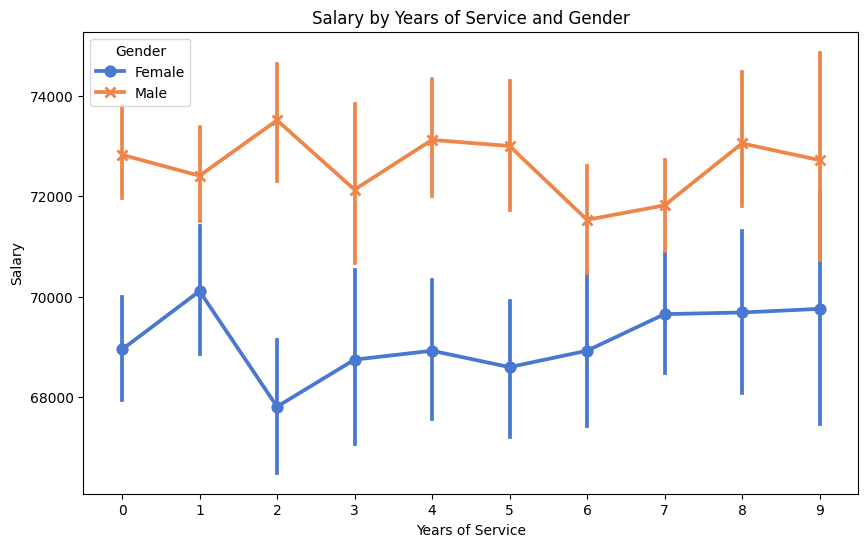

In [31]:
#Salary by Years of Service and Gender

plt.figure(figsize=(10, 6))
sns.pointplot(x='Years of Service', y='Salary', hue='Gender', data=HR, palette='muted', markers=['o', 'x'])
plt.title('Salary by Years of Service and Gender')
plt.xlabel('Years of Service')
plt.ylabel('Salary')
plt.legend(title='Gender')
plt.show()



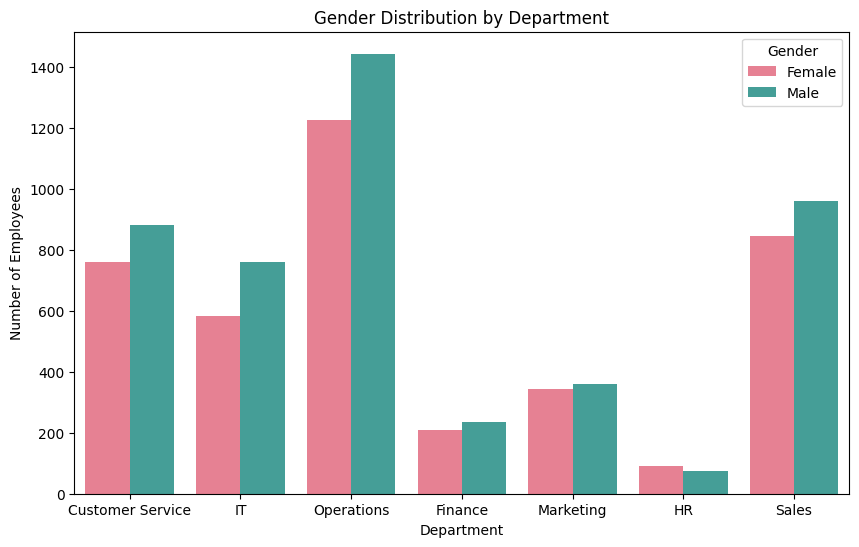

In [32]:
#Gender Distribution by Department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Gender', data=HR, palette='husl')
plt.title('Gender Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Gender')
plt.show()

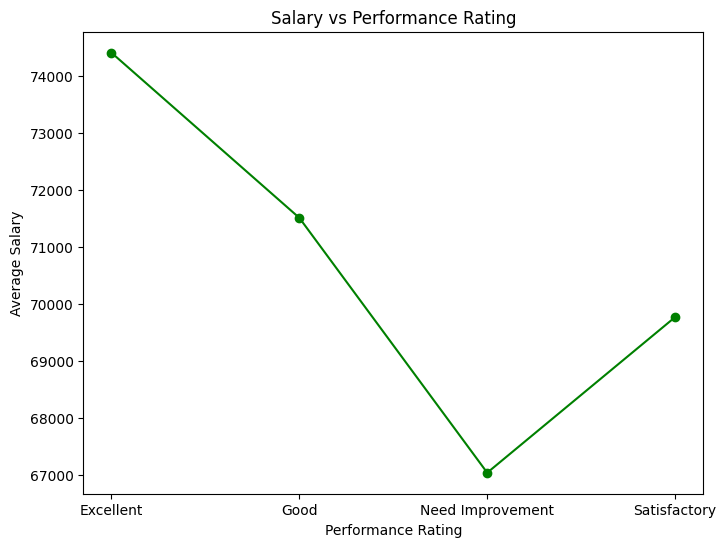

In [33]:
#Salary vs. Performance Rating
avg_salary_perf = HR.groupby('Performance Rating')['Salary'].mean()

plt.figure(figsize=(8, 6))
plt.plot(avg_salary_perf.index, avg_salary_perf.values, marker='o', color='green')
plt.title('Salary vs Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Average Salary')
plt.show()

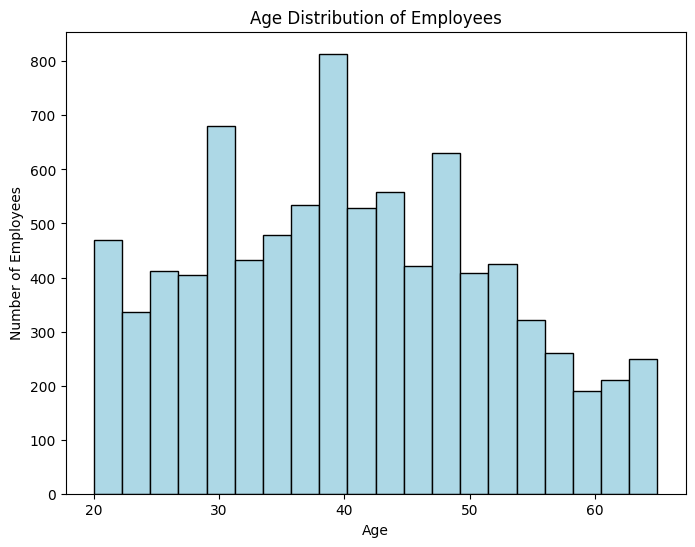

In [34]:
#Age Distribution
plt.figure(figsize=(8, 6))
HR['Age'].plot(kind='hist', bins=20, color='lightblue', edgecolor='black')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()


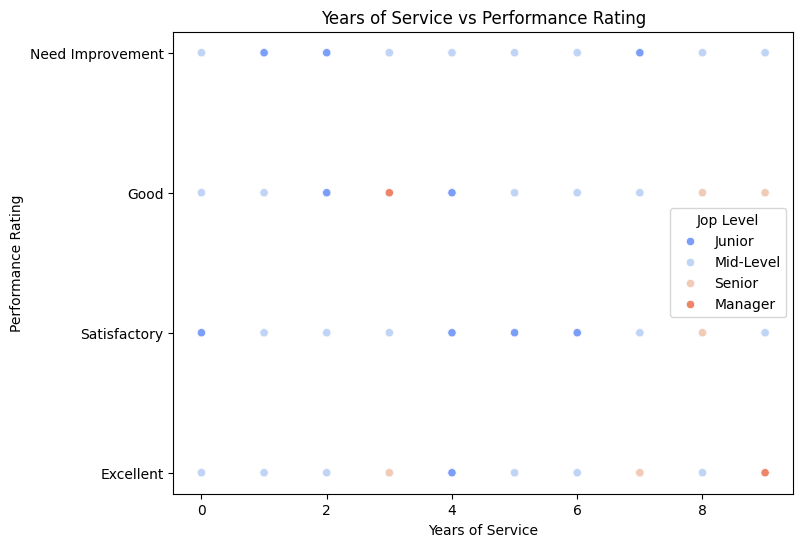

In [35]:
#Years of Service vs. Performance Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Years of Service', y='Performance Rating', data=HR, hue='Jop Level', palette='coolwarm')
plt.title('Years of Service vs Performance Rating')
plt.xlabel('Years of Service')
plt.ylabel('Performance Rating')
plt.show()

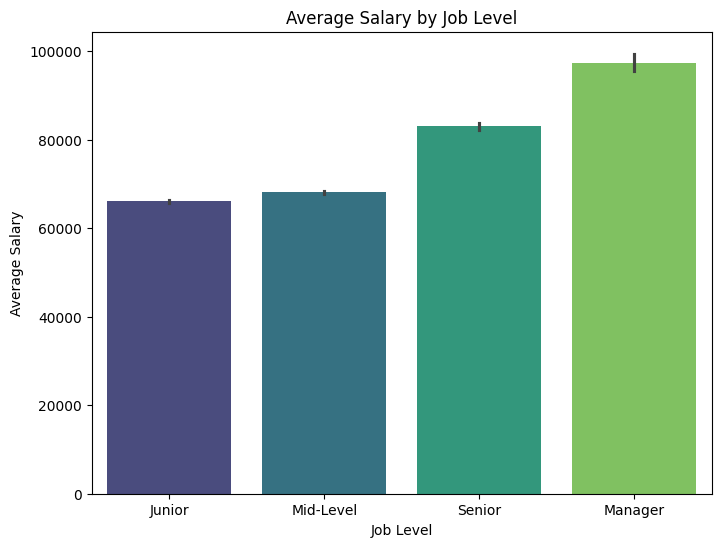

In [36]:
#Job Level vs. Salary Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='Jop Level', y='Salary', data=HR, hue='Jop Level', palette='viridis', legend=False)
plt.title('Average Salary by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Average Salary')
plt.show()

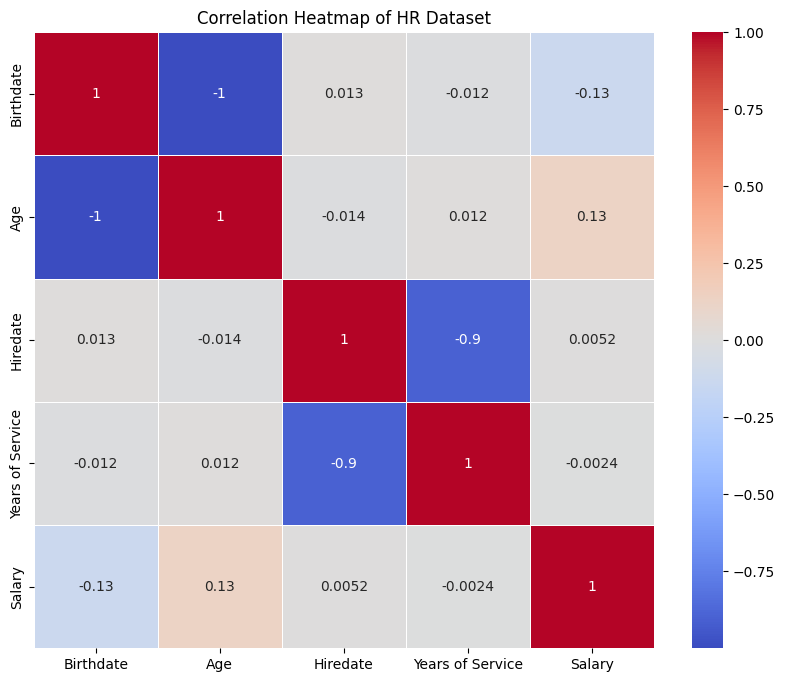

In [37]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(HR_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of HR Dataset')
plt.show()

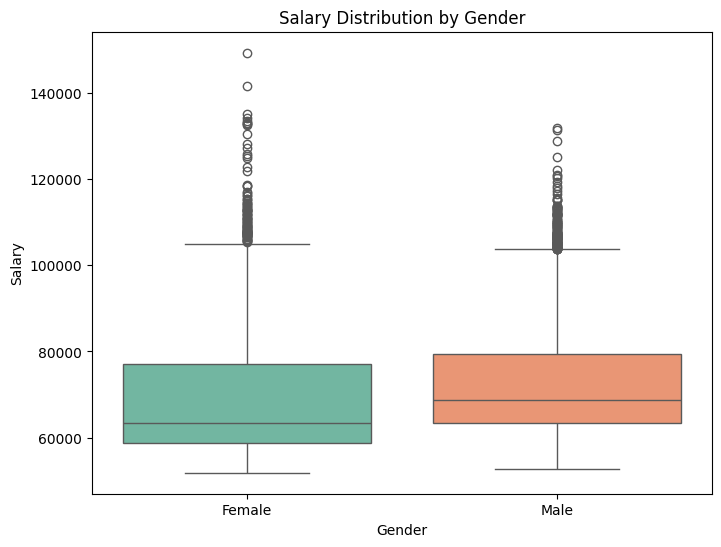

In [38]:
#Salary Distribution by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=HR, hue='Gender', palette='Set2', legend=False)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

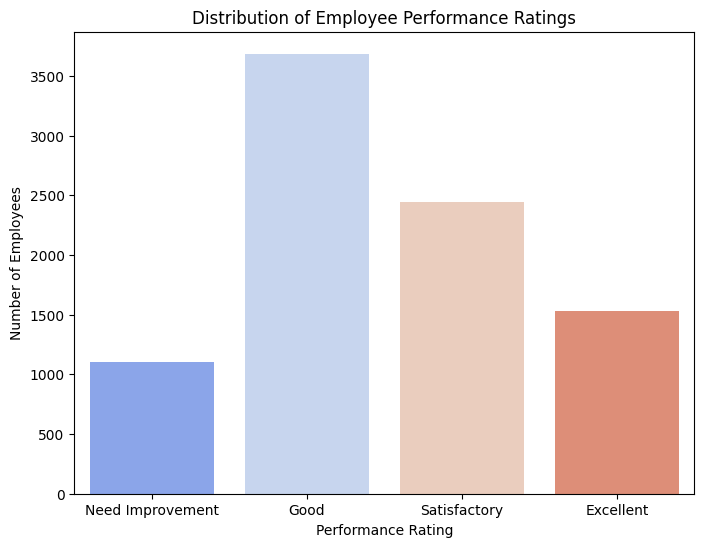

In [39]:
#Distribution of Performance Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Performance Rating', data=HR, hue='Performance Rating', palette='coolwarm', legend=False)
plt.title('Distribution of Employee Performance Ratings')
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')
plt.show()

##### What is the relation between employee age and performance rating?

C:\Users\Work-Station\AppData\Local\Temp\ipykernel_17184\4282733140.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  HR['Performance_Rating_num'] = HR['Performance Rating'].replace({


Age
20    2.549550
21    2.613260
22    2.741573
23    2.606250
24    2.593220
25    2.564516
26    2.646018
27    2.613861
28    2.586207
29    2.666667
30    2.705607
31    2.590698
32    2.635945
33    2.660465
34    2.704762
35    2.568773
36    2.644689
37    2.643678
38    2.614815
39    2.646388
40    2.725979
41    2.599237
42    2.586466
43    2.673993
44    2.596491
45    2.629956
46    2.620513
47    2.613333
48    2.569149
49    2.714286
50    2.700508
51    2.668246
52    2.669856
53    2.550926
54    2.728155
55    2.634783
56    2.666667
57    2.660550
58    2.694737
59    2.791209
60    2.707071
61    2.750000
62    2.684211
63    2.678899
64    2.758242
65    2.653061
Name: Performance_Rating_num, dtype: float64


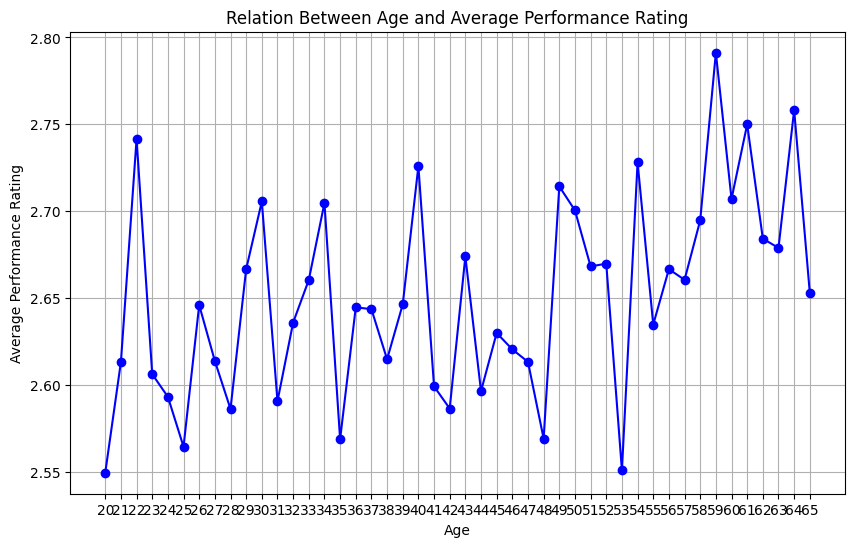

In [40]:
HR['Performance_Rating_num'] = HR['Performance Rating'].replace({
    'Excellent': 4,
    'Good': 3,
    'Satisfactory': 2,
    'Need Improvement': 1
})

# Group data by Age and calculate the mean of the numerical Performance Rating
age_perf = HR.groupby('Age')['Performance_Rating_num'].mean()
print(age_perf)

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.plot(age_perf.index, age_perf.values, marker='o', color='b')
plt.title('Relation Between Age and Average Performance Rating')
plt.xlabel('Age')
plt.ylabel('Average Performance Rating')
plt.xticks(age_perf.index)  
plt.grid()
plt.show()

##### What is the gender distribution across different job levels?

Jop Level  Junior  Manager  Mid-Level  Senior
Gender                                       
Female       1066      127       2208     653
Male         1262      118       2496     836


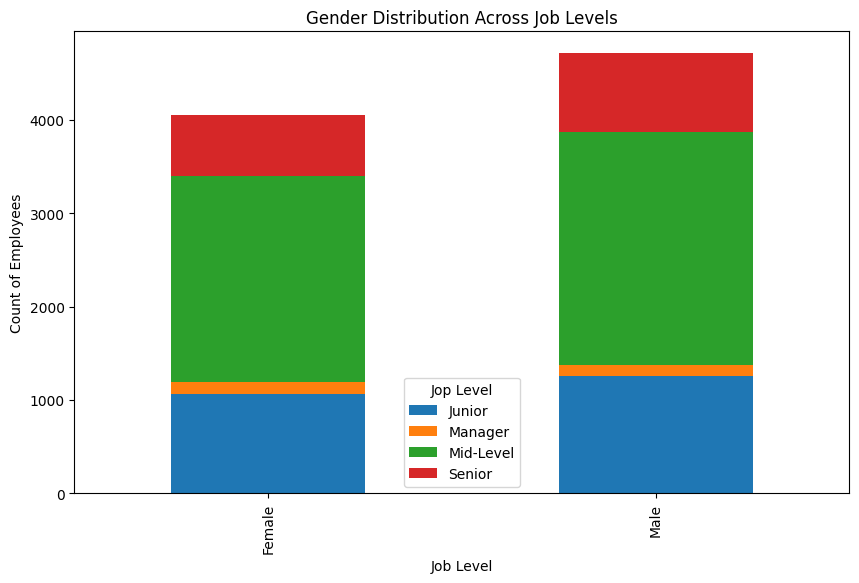

In [41]:
gender_job = HR.groupby(['Gender', 'Jop Level']).size().unstack()
print(gender_job)

# Plot the distribution
gender_job.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution Across Job Levels')
plt.xlabel('Job Level')
plt.ylabel('Count of Employees')
plt.show()


##### How does the years of service affect salary levels?

Years of Service
0    71022.106214
1    71370.995734
2    70768.928987
3    70493.282288
4    71174.062159
5    70917.136419
6    70391.824419
7    70840.120773
8    71486.589825
9    71253.361765
Name: Salary, dtype: float64


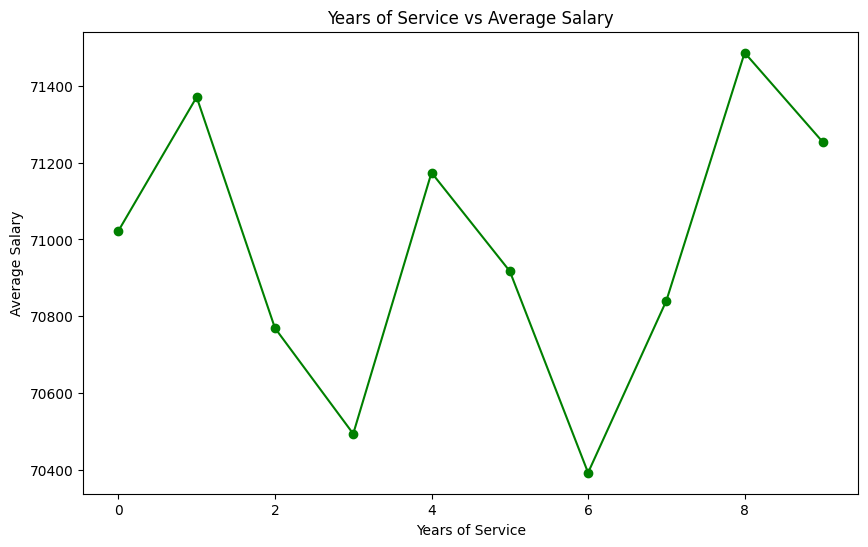

In [42]:
service_salary = HR.groupby('Years of Service')['Salary'].mean()
print(service_salary)

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.plot(service_salary.index, service_salary.values, marker='o', color='g')
plt.title('Years of Service vs Average Salary')
plt.xlabel('Years of Service')
plt.ylabel('Average Salary')
plt.show()

### Turnover Rate

In [43]:
# Create Turnover column: 0 if employee has left (Termdate is still employee ), 1 otherwise
HR['Turnover']= HR['Termdate'].apply(lambda x:0 if x=='Still Employee' else 1 )
# Check the updated DataFrame
print(HR[['Employee_ID', 'Full Name', 'Turnover']].head())


   Employee_ID         Full Name  Turnover
0  00-95822412  Danielle Johnson         1
1  00-42868828       John Taylor         1
2  00-83197857     Erica Mcclain         1
3  00-13999315  Brittany Johnson         1
4  00-90801586    Jeffery Wagner         0


In [44]:
# Calculate turnover rate (percentage of employees who left)
turnover_rate = HR['Turnover'].mean() * 100

print(f"Overall Turnover Rate: {turnover_rate:.2f}%")


Overall Turnover Rate: 11.02%


In [45]:
# Extract year from the 'Hiredate' column
HR['Hire_Year'] = HR['Hiredate'].dt.year

# Group by Hire_Year and calculate turnover rate for each year
turnover_by_year = HR.groupby('Hire_Year')['Turnover'].mean() * 100

# Display the turnover rates by year
print(turnover_by_year)

Hire_Year
2015     8.898305
2016    10.425240
2017    13.141026
2018    16.588235
2019    10.864745
2020    11.363636
2021     9.478673
2022    12.955854
2023     5.578684
2024     8.387097
Name: Turnover, dtype: float64


In [46]:
# Group by 'Department' and calculate turnover rate for each department
turnover_by_department = HR.groupby('Department')['Turnover'].mean() * 100

# Display turnover rate by department
print(turnover_by_department)

Department
Customer Service    11.219512
Finance             14.189189
HR                  12.195122
IT                  10.349963
Marketing            9.971510
Operations          10.832084
Sales               11.135734
Name: Turnover, dtype: float64


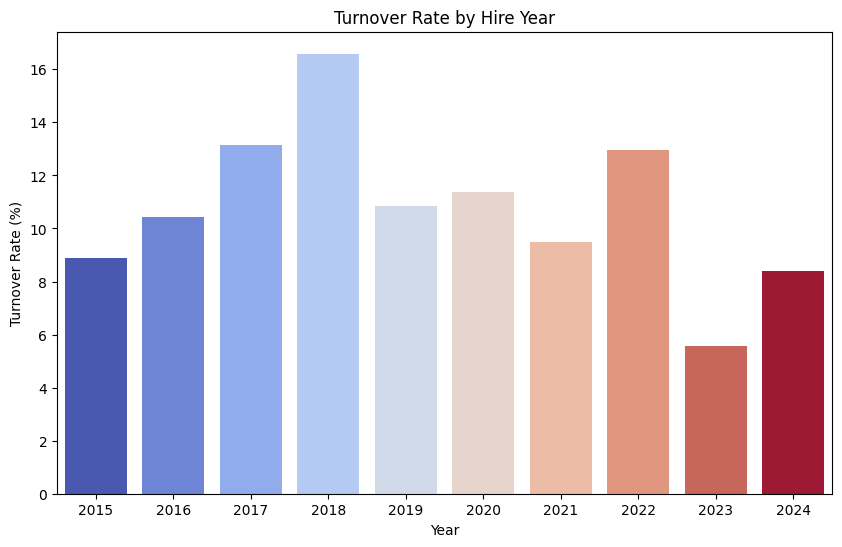

In [47]:
#Visualizing Turnover Rate by Year

plt.figure(figsize=(10, 6))
sns.barplot(x=turnover_by_year.index, y=turnover_by_year.values, hue=turnover_by_year.index, palette='coolwarm', legend=False)
plt.title('Turnover Rate by Hire Year')
plt.xlabel('Year')
plt.ylabel('Turnover Rate (%)')
plt.show()

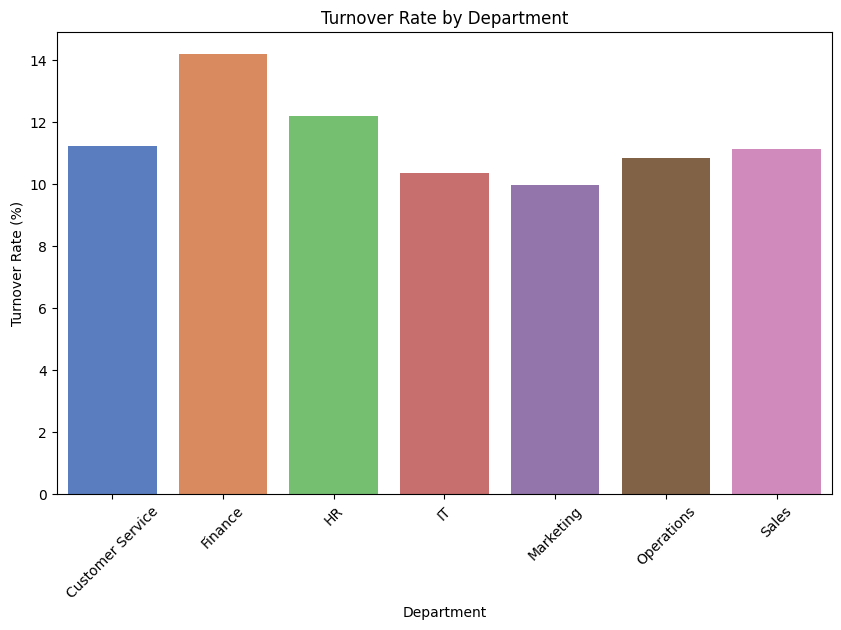

In [48]:

#Visualizing Turnover Rate by Department
plt.figure(figsize=(10, 6))
sns.barplot(x=turnover_by_department.index, y=turnover_by_department.values, hue=turnover_by_department.index, palette='muted', legend=False)
plt.title('Turnover Rate by Department')
plt.xlabel('Department')
plt.ylabel('Turnover Rate (%)')
plt.xticks(rotation=45)
plt.show()